# Dermatology dataset (multiclass classification)👩‍🔬🧴

# Goal

Throughout this project, we aim to determine the type of *Erythemato-squamous Disease* based on clinical and histopathological features. The diseases to be classified are:

1. Psoriasis
2. Seborrheic dermatitis
3. Lichen planus
4. Pityriasis rosea
5. Chronic dermatitis
6. Pityriasis rubra pilaris

These diseases exhibit similar clinical symptoms of erythema and scaling, which makes differential diagnosis challenging.


# About the dataset

The differential diagnosis of *erythemato-squamous diseases* is a significant challenge in dermatology, as their diagnosis relies on clinical characteristics with minimal differences. A biopsy is usually required for diagnosis, but unfortunately, these diseases also share many histopathological features.

Patients were first clinically evaluated based on 12 features. Then, skin samples were taken to assess 22 histopathological attributes. The values of the histopathological features were determined by analyzing the samples under a microscope.

In the dataset constructed for this domain:
* The 'family history' feature has a value of 1 if any of these diseases were observed in the family, and 0 otherwise.
* The 'age' feature simply represents the patient’s age.
* The other clinical and histopathological features received a value in the range of 0 to 3. A value of 0 indicates the feature was not present, 3 indicates the maximum possible presence, and 1 or 2 represent intermediate relative values.


# About the file

This dataset contains 34 attributes, 33 of which are linear-valued and one is nominal. The class attribute is the last column.

* **Number of instances:** 366
* **Number of attributes:** 34
* **Missing attribute values:** 8 (in the Age attribute), marked as `?`.

[Link to the source file on Kaggle](https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification)

> **Additional information about the dataset origin:**
>
> * **Source of information:**
>
>   * (a) Original owners:
>
>     * 1. Nilsel Ilter, MD, Ph.D., Gazi University, School of Medicine
>          06510 Ankara, Turkey
>          Phone: +90 (312) 214 1080
>     * 2. H. Altay Guvenir, Ph.D.,
>          Bilkent University,
>          Department of Computer Engineering and Information Science,
>          06533 Ankara, Turkey
>          Phone: +90 (312) 266 4133
>          Email: [guvenir@cs.bilkent.edu.tr](mailto:guvenir@cs.bilkent.edu.tr)
>   * (b) Donor:
>     H. Altay Guvenir, Bilkent University, Department of Computer Engineering and Information Science, 06533 Ankara, Turkey
>     Phone: +90 (312) 266 4133
>     Email: [guvenir@cs.bilkent.edu.tr](mailto:guvenir@cs.bilkent.edu.tr)
>   * (c) Date: January 1998
> * Extracted from [https://archive.ics.uci.edu/ml/datasets/Dermatology](https://archive.ics.uci.edu/ml/datasets/Dermatology)

---



#Attribute Dictionary

> ***Clinical Attributes:***
> *(Values range from 0 to 3 unless otherwise noted)*

1. **Phenomenon**
2. **Scaling**
3. **Definite borders**
4. **Itching**
5. **Koebner elbow involvement**
6. **Polygonal papules**
7. **Follicular papules**
8. **Oral mucosal involvement**
9. **Knee and erythema**
10. **Scalp involvement**
11. **Family history** *(0 or 1)*
12. **Age** *(linear)*

---

> ***Histopathological Attributes:***
> *(Values range from 0 to 3)*

12. **Melanin incontinence**
13. **Eosinophils in the infiltrate**
14. **PNL infiltrate**
15. **Fibrosis of the papillary dermis**
16. **Exocytosis**
17. **Acanthosis**
18. **Hyperkeratosis**
19. **Parakeratosis**
20. **Clubbing of the rete ridges**
21. **Elongation of the rete ridges**
22. **Thinning of the suprapapillary epidermis**
23. **Spongiform pustule**
24. **Munro microabscess**
25. **Focal hypergranulosis**
26. **Disappearance of the granular layer**
27. **Vacuolisation and damage of basal layer**
28. **Spongiosis**
29. **Saw-tooth appearance of rete ridges**
30. **Follicular horn plug**
31. **Perifollicular parakeratosis**
32. **Inflammatory mononuclear infiltrate**
33. **Band-like infiltrate**

---


# Imported Libraries and Dataset Installation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay,
    )
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from matplotlib.colors import Normalize
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree
from sklearn.linear_model import Perceptron
import time

# To install and load the dataset:



In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1MXc8QdRQzgWyJFucI4o4cihYbfVmi0Wx/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('xclara.csv')

df = pd.read_csv('xclara.csv')
df


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


# Exploratory Data Analysis

Let's begin by visualizing the data to identify patterns or insights that can be observed at first glance. We'll start by examining how many instances we have for each class label.

> 🔎 *Recall that the target classes are labeled from 1 to 6, and their meanings are specified in the "Objective" section.*

In [ ]:
df['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

According to the information provided by the dataset and its source, we know that there are missing values for the 'Age' feature, and these missing values are represented by the symbol '?'. Let's check whether these missing values are indeed present and how many there are.

In [ ]:
df.groupby('age').age.count()

age
0     1
10    7
12    3
13    2
15    2
     ..
70    4
75    1
8     7
9     2
?     8
Name: age, Length: 61, dtype: int64

The unknown data marked with '?' could pose a problem for execution.

There are 8 such values out of 366, which is about 2% of the data affected by this issue. We could either discard them or evaluate how the models perform in the presence of these missing values.

In our case, we will remove these data points later on.

Let's visualize the columns, that is, the names of the features. This information will be necessary for restructuring the dataset and selecting the data to use in the models.


In [ ]:
columns = df.columns.drop('class')
columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age'],
      dtype='object')

Let's also check the data types in the dataset. If any feature has a data type that could cause issues, we will change it if possible.

In [ ]:
df.dtypes

erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

We observe that the 'age' feature is of type object, when it should be integer. This is caused by the missing values marked with '?'

Therefore, let's fix this.

First, we remove the '?' entries, then we change the feature’s data type.

In [ ]:
miss_data = '?'
df_new = df.drop(df[df['age'] == miss_data].index)
df_new

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [ ]:
df_new['age'] = df_new['age'].astype(float).astype(pd.Int64Dtype())

In [ ]:
df_new.dtypes

erythema                               int64
scaling                                int64
definite_borders                       int64
itching                                int64
koebner_phenomenon                     int64
polygonal_papules                      int64
follicular_papules                     int64
oral_mucosal_involvement               int64
knee_and_elbow_involvement             int64
scalp_involvement                      int64
family_history                         int64
melanin_incontinence                   int64
eosinophils_infiltrate                 int64
PNL_infiltrate                         int64
fibrosis_papillary_dermis              int64
exocytosis                             int64
acanthosis                             int64
hyperkeratosis                         int64
parakeratosis                          int64
clubbing_rete_ridges                   int64
elongation_rete_ridges                 int64
thinning_suprapapillary_epidermis      int64
spongiform

Now, let's visualize the data we have. We can see the number of samples per class and the distribution of ages in the dataset. We can also observe the frequency of each severity level for every feature.

Text(0.5, 1.0, 'Age Distribution')

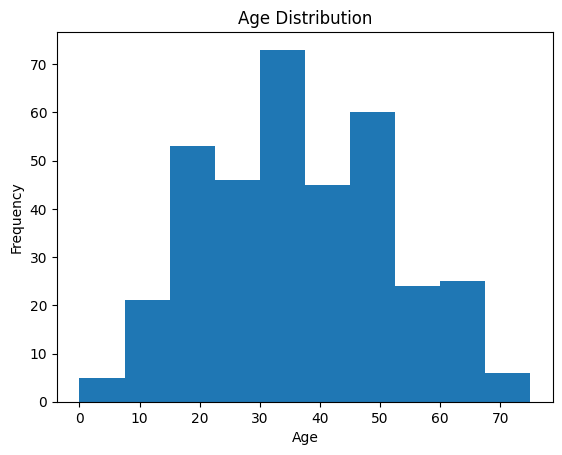

In [ ]:
plt.hist(df_new['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

In this chart, we can see that the ages with the highest prevalence of these diseases are between 30 and 40 years old.

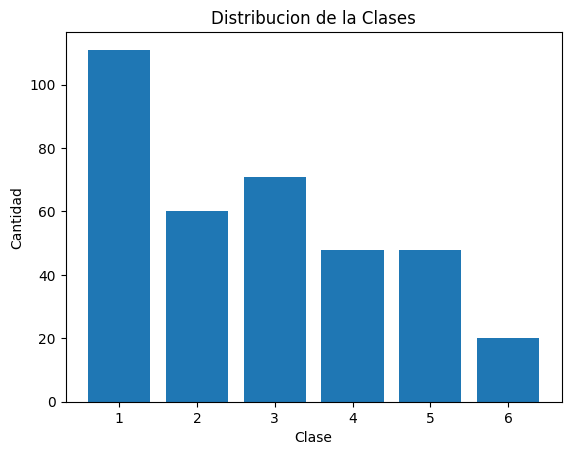

In [ ]:
class_counts = df_new['class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribucion de la Clases')
plt.show()


From this chart, we can see that the class with the most instances in the dataset is class 1, which corresponds to 'psoriasis'.

<ipython-input-13-2a473563afe2>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,5,i+1)


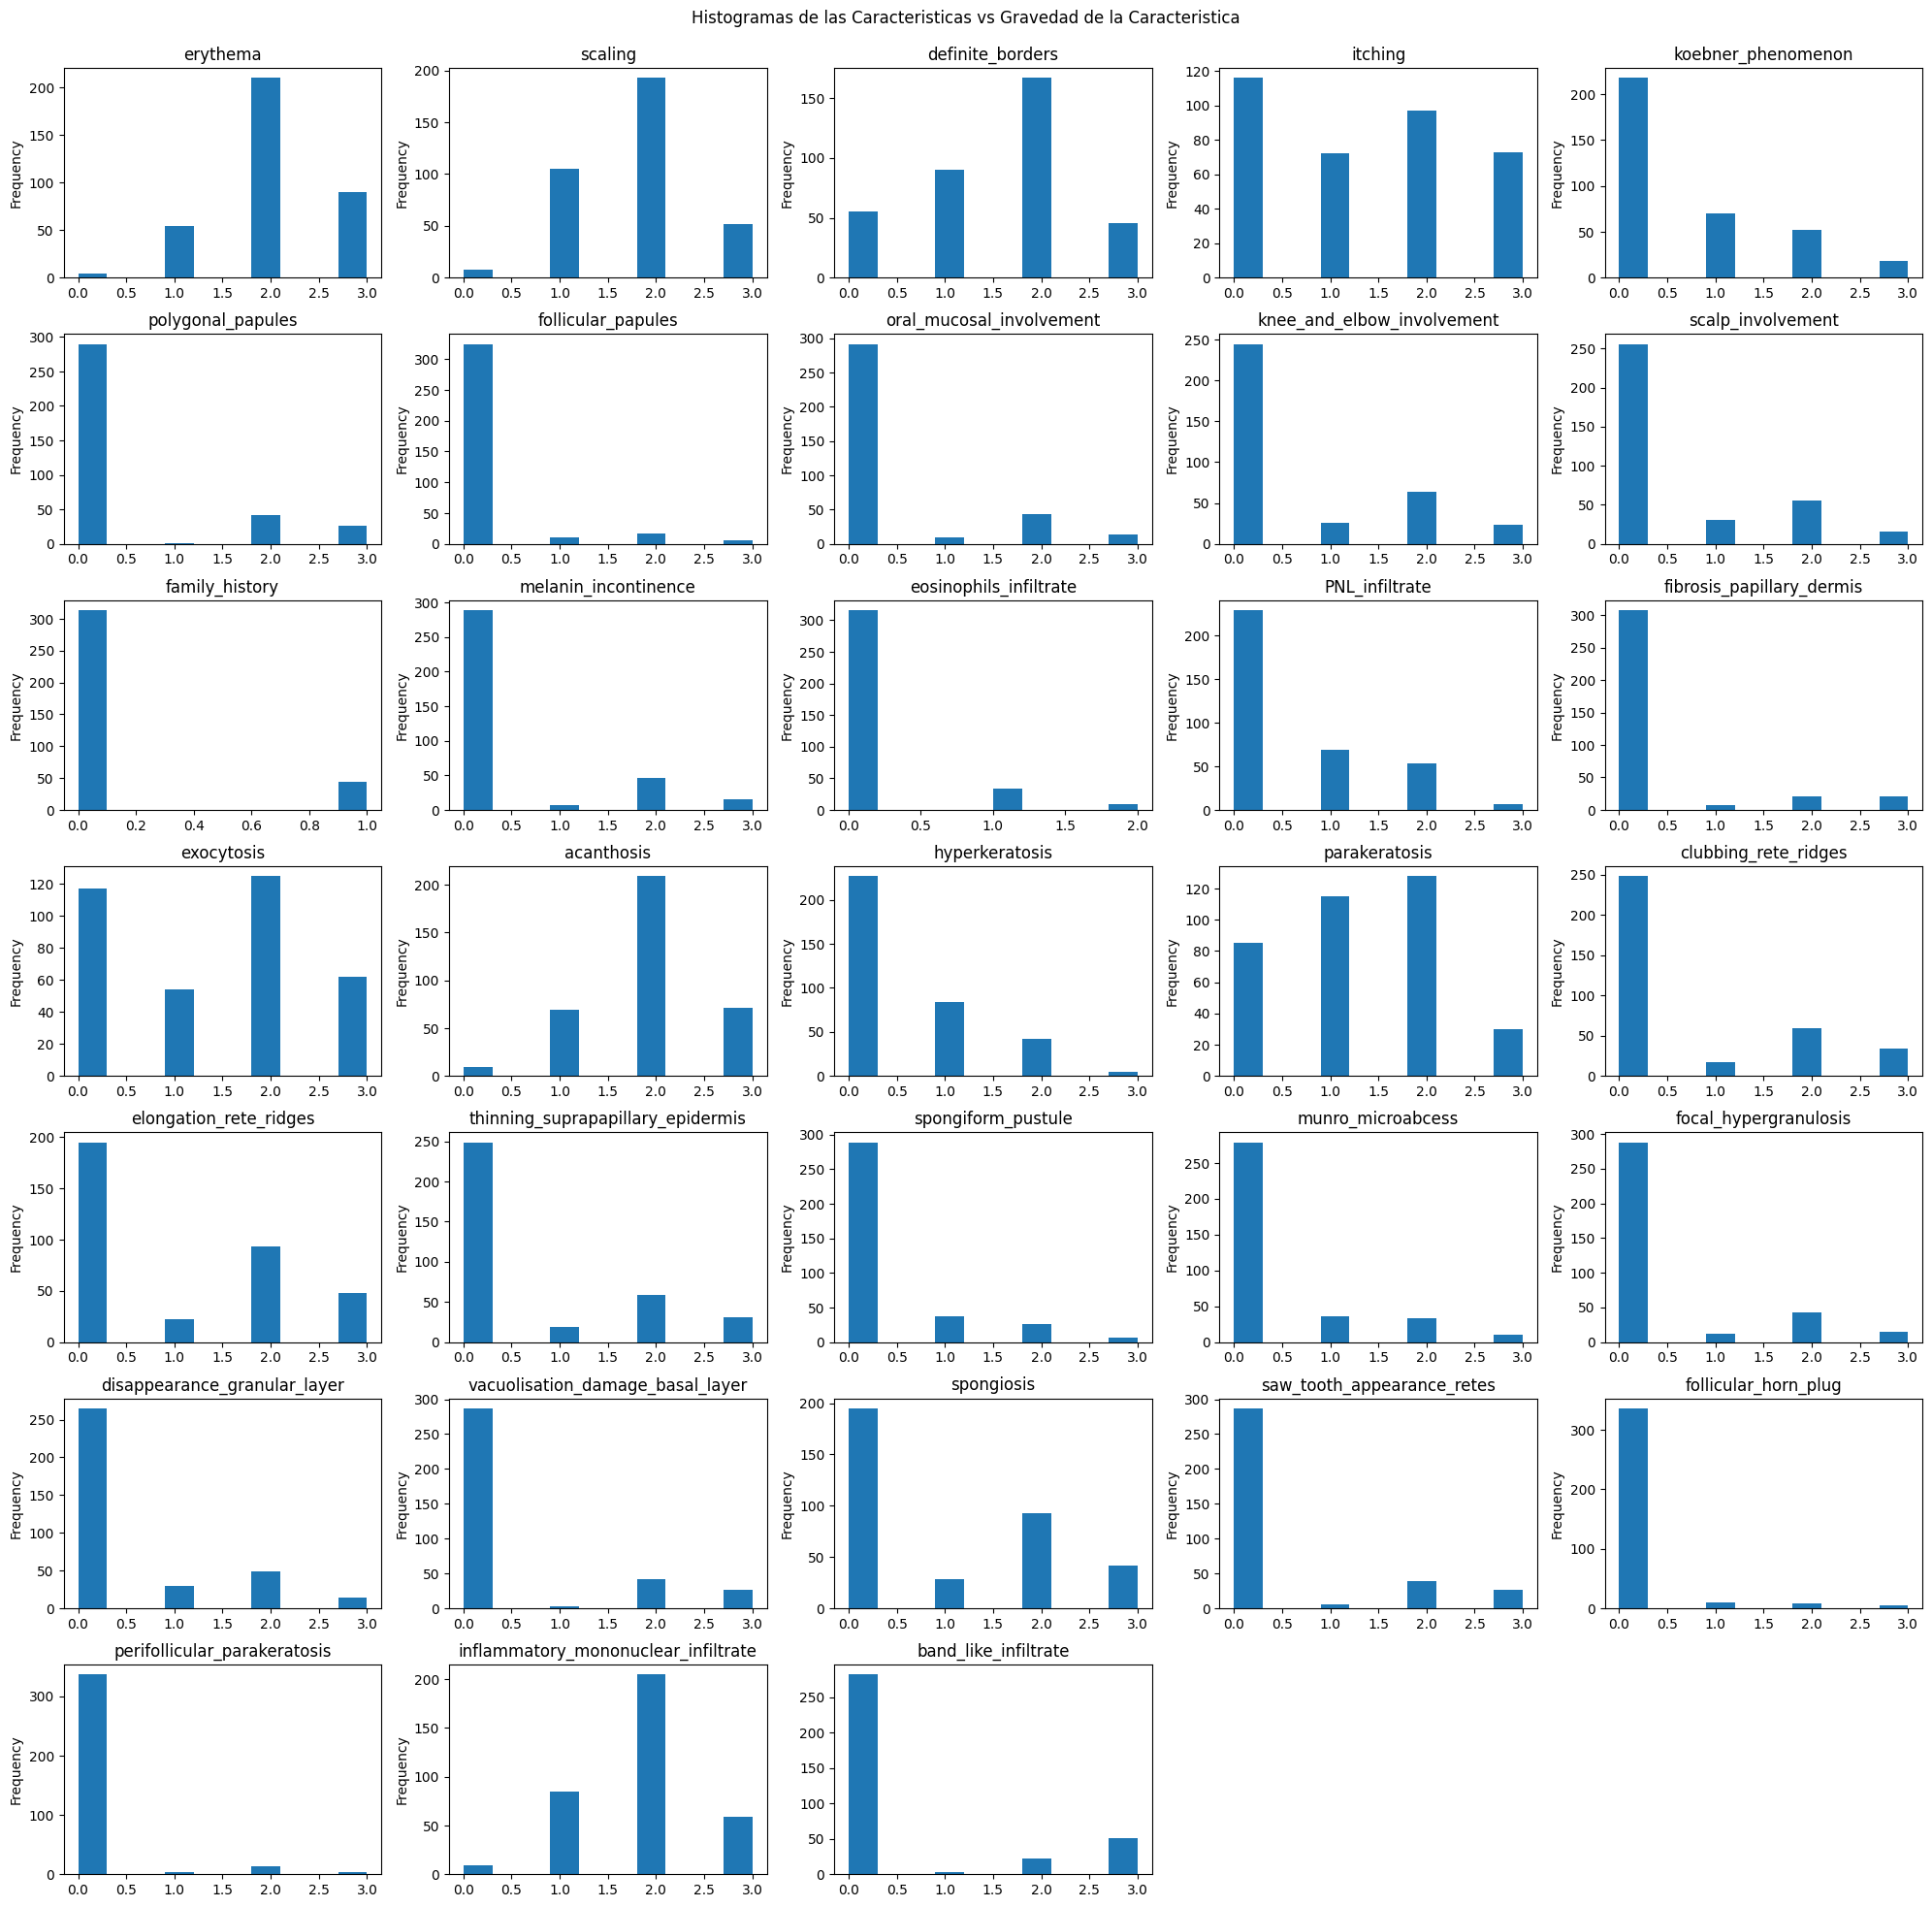

In [ ]:
plt.figure(figsize=(20, 20))

#33 caracteristicas que devuelven valores de 0 a 3 segun su gravedad
for i in range(33):
  plt.ylabel('Frequency')
  plt.subplot(7,5,i+1)
  plt.hist(df_new[columns[i]])
  plt.title(columns[i])

plt.tight_layout(pad=1)
plt.subplots_adjust(top=0.95)
plt.suptitle('Histogramas de las Caracteristicas vs Gravedad de la Caracteristica')
plt.show()

The graphs show varied data, but overall, some features have severity level 0, while others have moderate severity levels. There are very few features with high severity levels.

This may reflect, to some extent, the medical difficulty in diagnosing these cases.

To further analyze the relationships between the features, let's look at their correlations.

In [ ]:
corr_matrix = df_new.corr()
corr_matrix

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,...,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,...,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,...,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,...,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,...,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,...,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,...,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,...,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,...,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,...,0.485260,-0.257697,-0.425421,-0.262429,-0.055091,-0.020456,0.027887,-0.255333,0.036412,-0.534716


To interpret the correlation matrix more quickly and simply, we can plot a heatmap of these correlations.

The following map shows values between -1 and 1, where the darker or lighter colors represent stronger correlations.

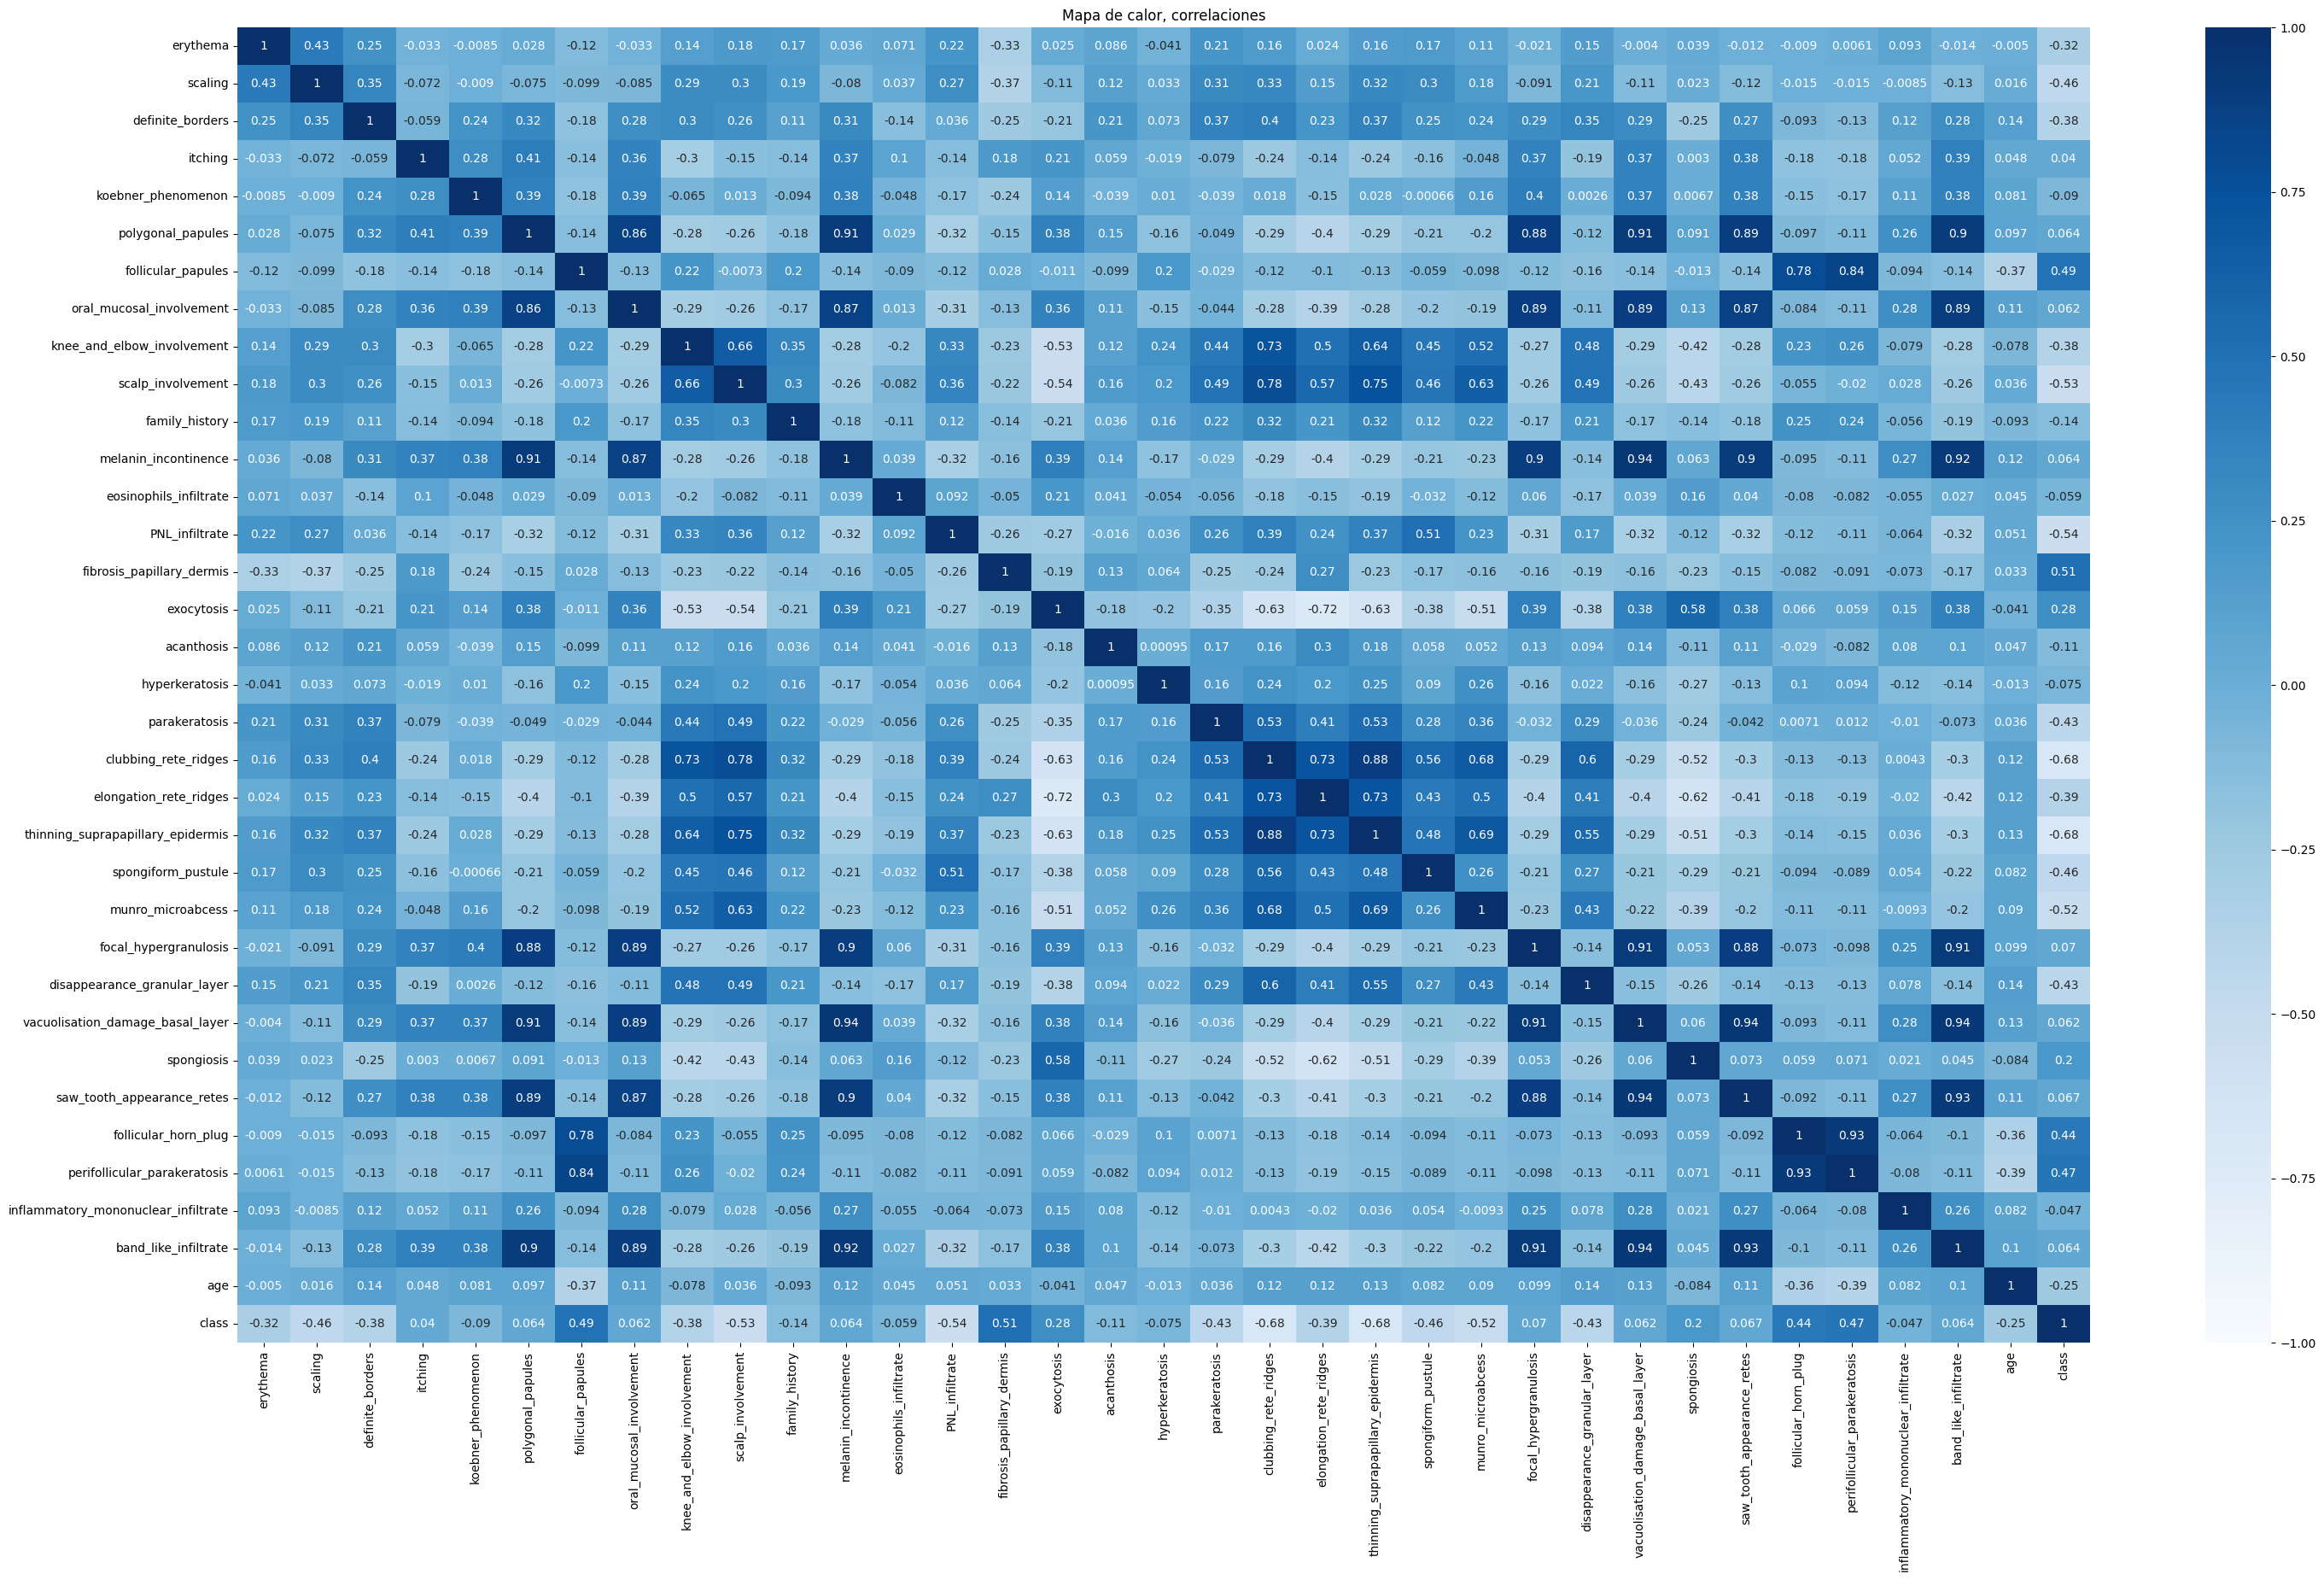

In [ ]:
plt.figure(figsize=(35,20))
plt.title("Mapa de calor, correlaciones")
sns.heatmap(corr_matrix, annot=True,cmap='Blues', vmin=-1, vmax =1)

plt.show()

We can see that several features are correlated. It would be interesting to observe those that combine clinical features with histopathological ones.

# Model Execution and Comparison

First, let's prepare the data for training the methods. We split the training and test data from a portion of the dataset and standardize them.
We will save all the results and review them in the 'Results Comparison' section

In [ ]:
results = {}
results_y_pred = []

In [ ]:
X = df_new.drop('class', axis=1)
y = df_new['class']
class_names = ['psoriasis', 'seborrheic dermatitis', 'lichen planus', 'pityriasis rosea', 'chronic dermatitis', 'pityriasis rubra pilaris']

X_train, X_test, y_train,y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Naive Bayes Model

Let's use the Naive Bayes method as a baseline classifier since it is a simple and fast method that works well for high-dimensional problems.

Naive Bayes is a probabilistic classifier that models the joint distribution of features and the target class using Bayes' theorem and the assumption that features are conditionally independent given the target class.

In [ ]:
start_time = time.time()

model = GaussianNB()
model.fit(X_train, y_train);
y_pred = model.predict(X_test)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Gaussian Naive Bayes'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

# Principal Component Analysis (PCA)

Another good model option is Principal Component Analysis (PCA), as it is a technique used for dimensionality reduction.

In [ ]:
pca= PCA(n_components=30,svd_solver='randomized',whiten=False)
F30 = pca.fit(X)

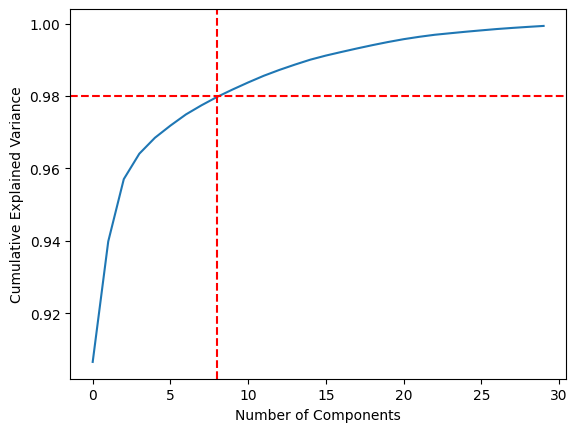

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.98,color='r',linestyle='--')
plt.axvline(x=8,color='r',linestyle='--');

From the analysis above, we see that with a very small number of features we can already achieve very good results.

In [ ]:
n_components = 8
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
start_time = time.time()

model = GaussianNB()
model.fit(X_train_pca, y_train);
y_pred = model.predict(X_test_pca)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Principal Component Analysis (PCA)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

# Support Vector Machines (SVM)


The next classifier we can analyze is a linear classifier for multiclass classification. SVM can also handle multiclass classification problems, which is the case we have. At the same time, it is a more powerful classifier than the previous ones.


In [ ]:
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [ ]:
C_range = np.logspace(-2, 10, 6)
gamma_range = np.logspace(-2, 1, 6)

print(C_range)
print(gamma_range)


[1.00000000e-02 2.51188643e+00 6.30957344e+02 1.58489319e+05
 3.98107171e+07 1.00000000e+10]
[ 0.01        0.03981072  0.15848932  0.63095734  2.51188643 10.        ]


In [ ]:
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, train_size=0.3, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)


The best parameters are {'C': 2.5118864315095797, 'gamma': 0.039810717055349734} with a score of 0.96


In [ ]:
best_C = grid.best_params_['C']
best_gamma = grid.best_params_['gamma']

In [ ]:
start_time = time.time()

clf = SVC(random_state=0, C=best_C, gamma=best_gamma).fit(X_train, y_train)
y_pred = clf.predict(X_test)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Support Vector Machines (SVM)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

# Decision Tree

Another classifier I wanted to try was a non-parametric classifier, the Decision Tree, because I wanted to see how it would model the decision rules for the decision tree.

[Text(0.7948717948717948, 0.9615384615384616, 'clubbing_rete_ridges <= -0.155\ngini = 0.797\nsamples = 268\nvalue = [85, 42, 53, 37, 34, 17]'),
 Text(0.6923076923076923, 0.8846153846153846, 'vacuolisation_damage_basal_layer <= 0.035\ngini = 0.785\nsamples = 185\nvalue = [3, 42, 53, 37, 34, 16]'),
 Text(0.6410256410256411, 0.8076923076923077, 'fibrosis_papillary_dermis <= 0.281\ngini = 0.739\nsamples = 132\nvalue = [3, 42, 0, 37, 34, 16]'),
 Text(0.5897435897435898, 0.7307692307692307, 'koebner_phenomenon <= -0.142\ngini = 0.646\nsamples = 98\nvalue = [3, 42, 0, 37, 0, 16]'),
 Text(0.48717948717948717, 0.6538461538461539, 'follicular_papules <= 2.077\ngini = 0.556\nsamples = 67\nvalue = [3, 41, 0, 7, 0, 16]'),
 Text(0.4358974358974359, 0.5769230769230769, 'disappearance_granular_layer <= 0.034\ngini = 0.331\nsamples = 51\nvalue = [3, 41, 0, 7, 0, 0]'),
 Text(0.38461538461538464, 0.5, 'thinning_suprapapillary_epidermis <= 0.801\ngini = 0.231\nsamples = 47\nvalue = [3, 41, 0, 3, 0, 0]'),


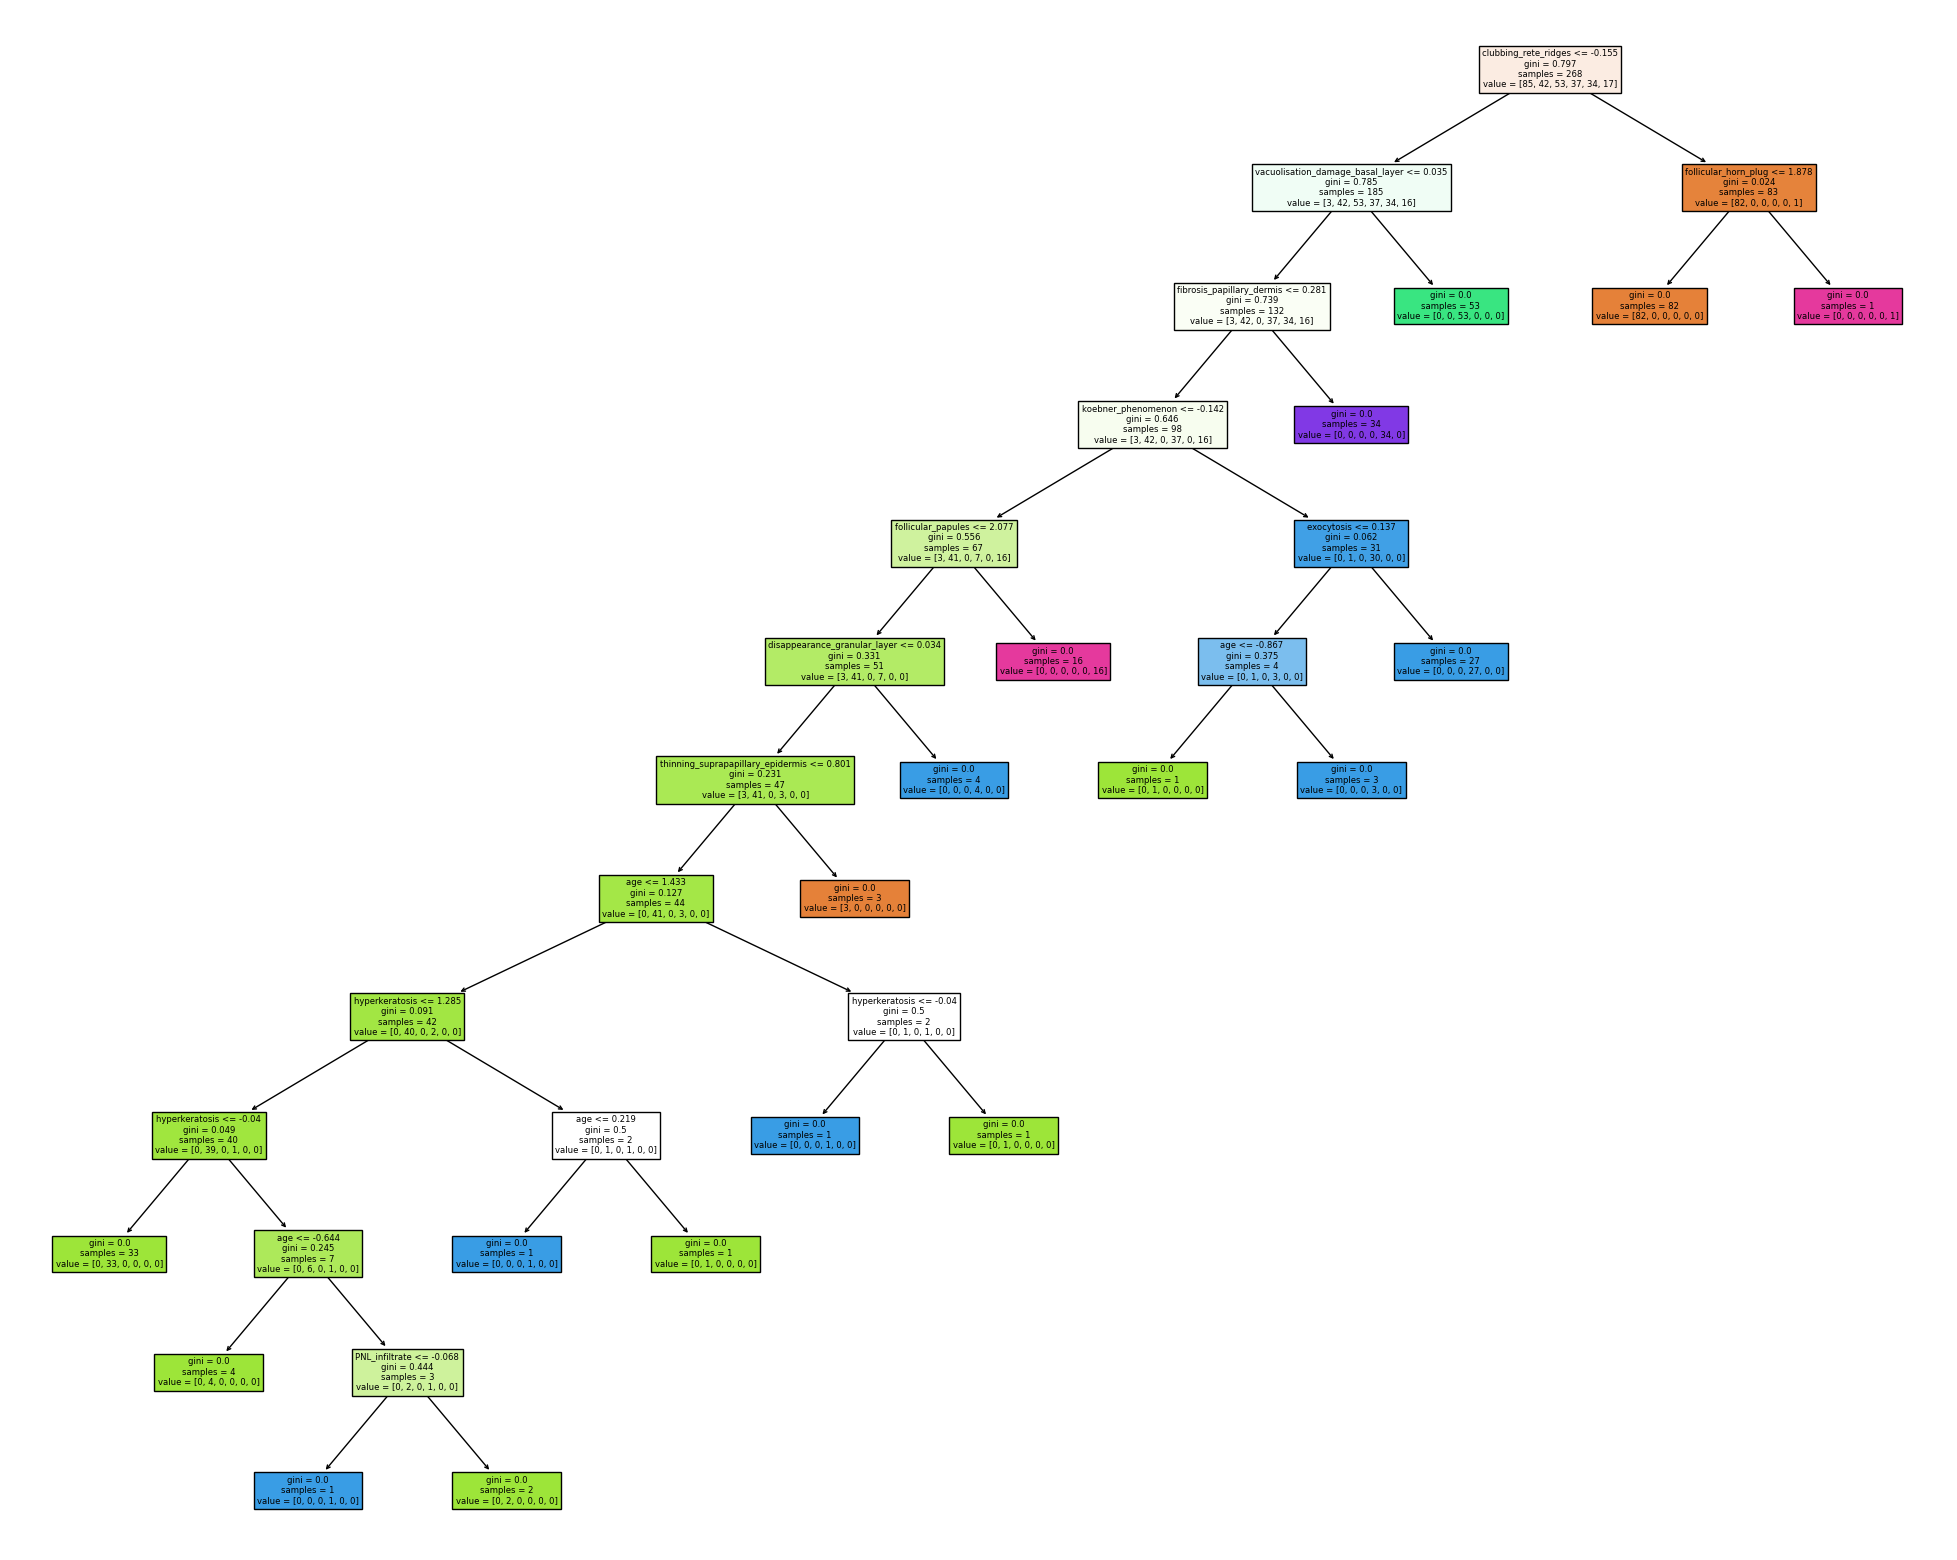

In [ ]:
plt.figure(figsize=(25,20))

start_time = time.time()

dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Decision Tree'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

tree.plot_tree(dtree, filled=True,feature_names=df_new.columns)


# Perceptron

Finally, I also wanted to consider a more powerful linear classifier, capable of finding an optimal solution vector if the samples are separable. We don’t know this upfront, but if it yields good results, it could be considered for use.

In [ ]:
start_time = time.time()

clf = Perceptron(tol=1e-3, random_state=0)
X_train_perc = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Perceptron'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

[Text(0.7714285714285715, 0.9615384615384616, 'clubbing_rete_ridges <= 0.5\ngini = 0.797\nsamples = 268\nvalue = [85, 42, 53, 37, 34, 17]'),
 Text(0.6571428571428571, 0.8846153846153846, 'vacuolisation_damage_basal_layer <= 0.5\ngini = 0.785\nsamples = 185\nvalue = [3, 42, 53, 37, 34, 16]'),
 Text(0.6, 0.8076923076923077, 'fibrosis_papillary_dermis <= 0.5\ngini = 0.739\nsamples = 132\nvalue = [3, 42, 0, 37, 34, 16]'),
 Text(0.5428571428571428, 0.7307692307692307, 'koebner_phenomenon <= 0.5\ngini = 0.646\nsamples = 98\nvalue = [3, 42, 0, 37, 0, 16]'),
 Text(0.42857142857142855, 0.6538461538461539, 'follicular_papules <= 1.5\ngini = 0.556\nsamples = 67\nvalue = [3, 41, 0, 7, 0, 16]'),
 Text(0.37142857142857144, 0.5769230769230769, 'disappearance_granular_layer <= 0.5\ngini = 0.331\nsamples = 51\nvalue = [3, 41, 0, 7, 0, 0]'),
 Text(0.3142857142857143, 0.5, 'thinning_suprapapillary_epidermis <= 1.5\ngini = 0.231\nsamples = 47\nvalue = [3, 41, 0, 3, 0, 0]'),
 Text(0.2571428571428571, 0.423

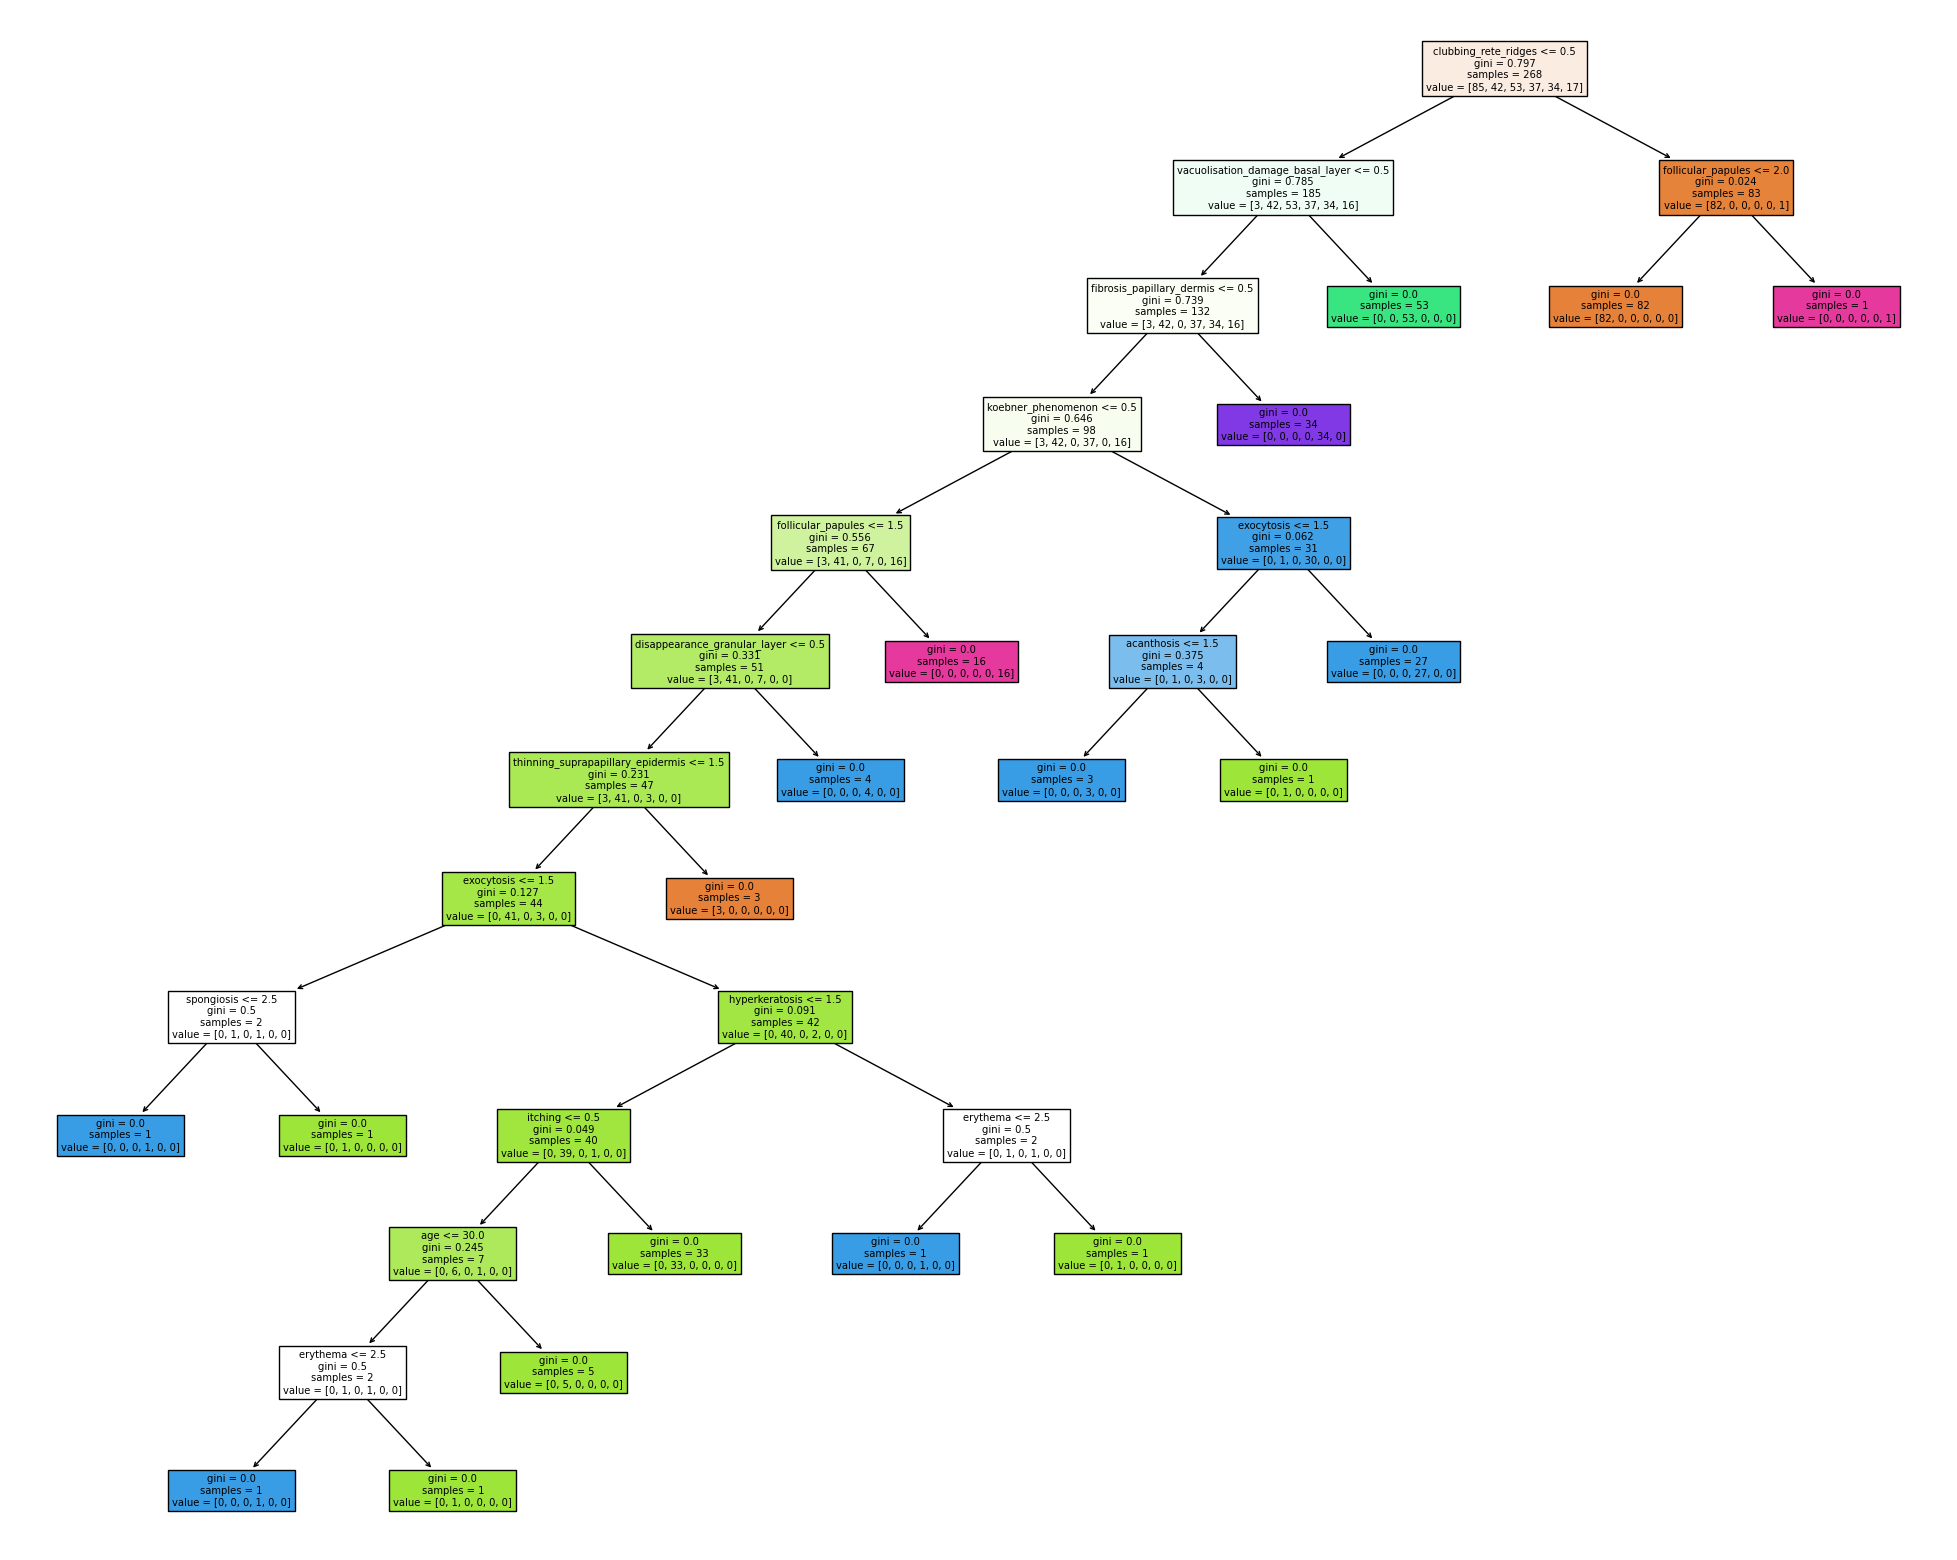

In [ ]:
X = df_new.drop('class', axis=1)
y = df_new['class']
class_names = ['psoriasis', 'seborrheic dermatitis', 'lichen planus', 'pityriasis rosea', 'chronic dermatitis', 'pityriasis rubra pilaris']

X_train, X_test, y_train,y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)


plt.figure(figsize=(25,20))

start_time = time.time()

dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Decision Tree 2'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

tree.plot_tree(dtree, filled=True,feature_names=df_new.columns)


# Comparison of Results

For the comparison of results, let's examine the confusion matrices of each method used, along with the saved results for accuracy, precision, recall, F1-score, and execution time.

>Naive Bayes

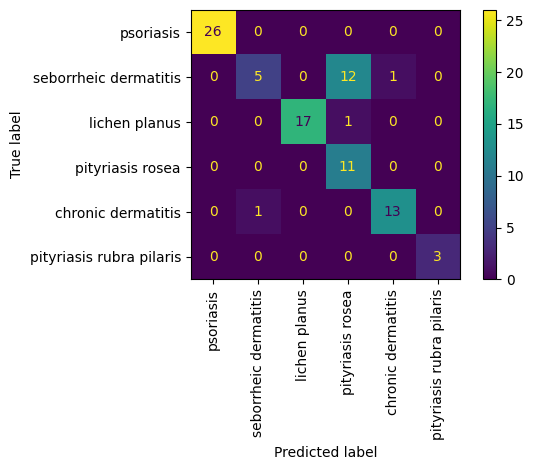

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, results_y_pred[0], display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

> PCA

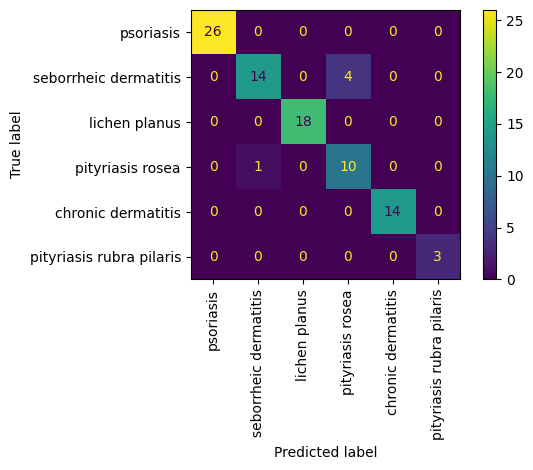

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, results_y_pred[1], display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

> Support Vector Machines (SVM)

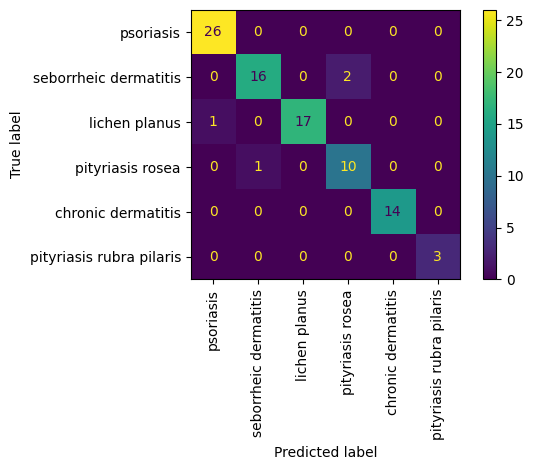

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, results_y_pred[2], display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

> Decision Tree

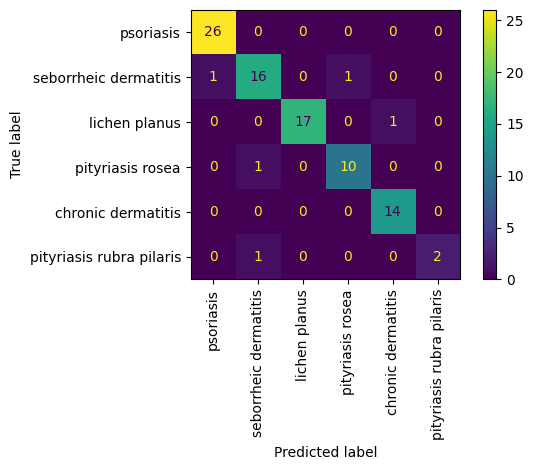

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, results_y_pred[3], display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

> Perceptron

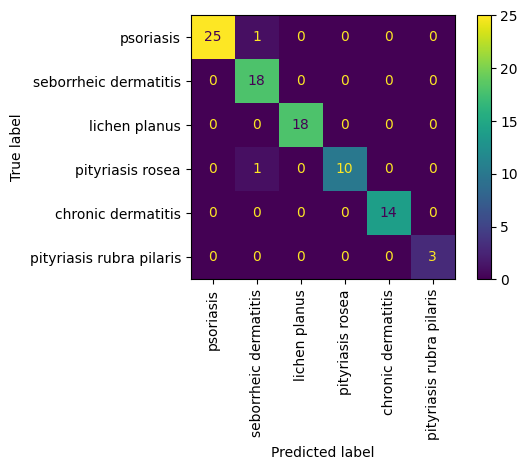

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, results_y_pred[4], display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

For better visualization of the obtained results, let's define a dataframe containing all the collected information.

In [ ]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Gaussian Naive Bayes,0.833333,0.889352,0.833333,0.821111,0.004182
Principal Component Analysis (PCA),0.944444,0.951746,0.944444,0.945253,0.005808
Support Vector Machines (SVM),0.955556,0.957165,0.955556,0.955750,0.014663
Decision Tree,0.933333,0.936708,0.933333,0.928291,0.004287
Perceptron,0.977778,0.980000,0.977778,0.977989,0.018287
Decision Tree 2,0.922222,0.931509,0.922222,0.918830,0.011062


#Attached Objective



Suppose we want to perform the same previous analysis but using only the clinical features, that is,

"Could the patient be classified without needing a biopsy?"

That was one of my questions when I saw the dataset divided into two main types of features. Therefore, I analyzed the dataset with the same models but using only the clinical features, and this is what happened.

In [ ]:
df_testing = df_new.drop(['melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate'],axis=1)
df_testing

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,age,class
0,2,2,0,3,0,0,0,0,1,0,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,8,1
2,2,1,2,3,1,3,0,3,0,0,0,26,3
3,2,2,2,0,0,0,0,0,3,2,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,28,3
364,2,1,3,1,2,3,0,2,0,0,0,50,3


In [ ]:
results = {}
results_y_pred = []

In [ ]:
X = df_testing.drop('class', axis=1)
y = df_testing['class']
class_names = ['psoriasis', 'seborrheic dermatitis', 'lichen planus', 'pityriasis rosea', 'chronic dermatitis', 'pityriasis rubra pilaris']

X_train, X_test, y_train,y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Modelo Naive Bayes

In [ ]:
start_time = time.time()

model = GaussianNB()
model.fit(X_train, y_train);
y_pred = model.predict(X_test)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Gaussian Naive Bayes'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

# Principal Component Analysis (PCA)

In [ ]:
pca= PCA(n_components=12,svd_solver='randomized',whiten=False)
F12 = pca.fit(X)

Expliend Variance

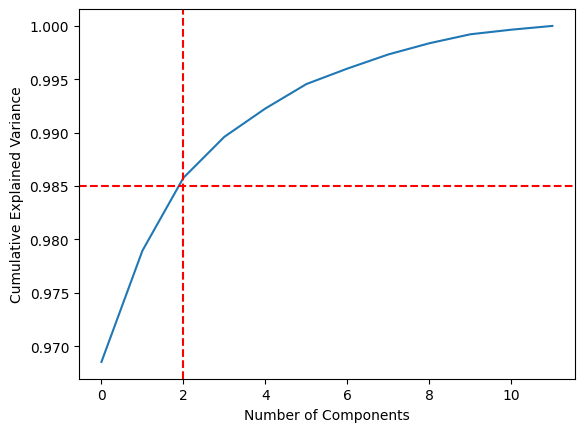

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.985,color='r',linestyle='--')
plt.axvline(x=2,color='r',linestyle='--');

In [ ]:
n_components = 3
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
start_time = time.time()

model = GaussianNB()
model.fit(X_train_pca, y_train);
y_pred = model.predict(X_test_pca)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Principal Component Analysis (PCA)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

# Support Vector Machines (SVM)


In [ ]:
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [ ]:
C_range = np.logspace(-2, 10, 6)
gamma_range = np.logspace(-2, 1, 6)

print(C_range)
print(gamma_range)


[1.00000000e-02 2.51188643e+00 6.30957344e+02 1.58489319e+05
 3.98107171e+07 1.00000000e+10]
[ 0.01        0.03981072  0.15848932  0.63095734  2.51188643 10.        ]


In [ ]:
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, train_size=0.3, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)


The best parameters are {'C': 2.5118864315095797, 'gamma': 0.039810717055349734} with a score of 0.86


In [ ]:
best_C = grid.best_params_['C']
best_gamma = grid.best_params_['gamma']

In [ ]:
start_time = time.time()

clf = SVC(random_state=0, C=best_C, gamma=best_gamma).fit(X_train, y_train)
y_pred = clf.predict(X_test)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Support Vector Machines (SVM)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

# Decision Tree

[Text(0.8025568181818182, 0.9705882352941176, 'oral_mucosal_involvement <= 0.138\ngini = 0.797\nsamples = 268\nvalue = [85, 42, 53, 37, 34, 17]'),
 Text(0.7798295454545454, 0.9117647058823529, 'scalp_involvement <= -0.072\ngini = 0.751\nsamples = 218\nvalue = [85, 42, 3, 37, 34, 17]'),
 Text(0.6051136363636364, 0.8529411764705882, 'koebner_phenomenon <= -0.142\ngini = 0.774\nsamples = 139\nvalue = [16, 38, 2, 37, 34, 12]'),
 Text(0.39204545454545453, 0.7941176470588235, 'scaling <= -0.485\ngini = 0.724\nsamples = 101\nvalue = [10, 37, 1, 7, 34, 12]'),
 Text(0.17045454545454544, 0.7352941176470589, 'follicular_papules <= 3.668\ngini = 0.436\nsamples = 34\nvalue = [0, 3, 0, 3, 25, 3]'),
 Text(0.14772727272727273, 0.6764705882352942, 'itching <= -0.715\ngini = 0.331\nsamples = 31\nvalue = [0, 3, 0, 3, 25, 0]'),
 Text(0.09090909090909091, 0.6176470588235294, 'follicular_papules <= 0.487\ngini = 0.611\nsamples = 6\nvalue = [0, 1, 0, 2, 3, 0]'),
 Text(0.06818181818181818, 0.5588235294117647,

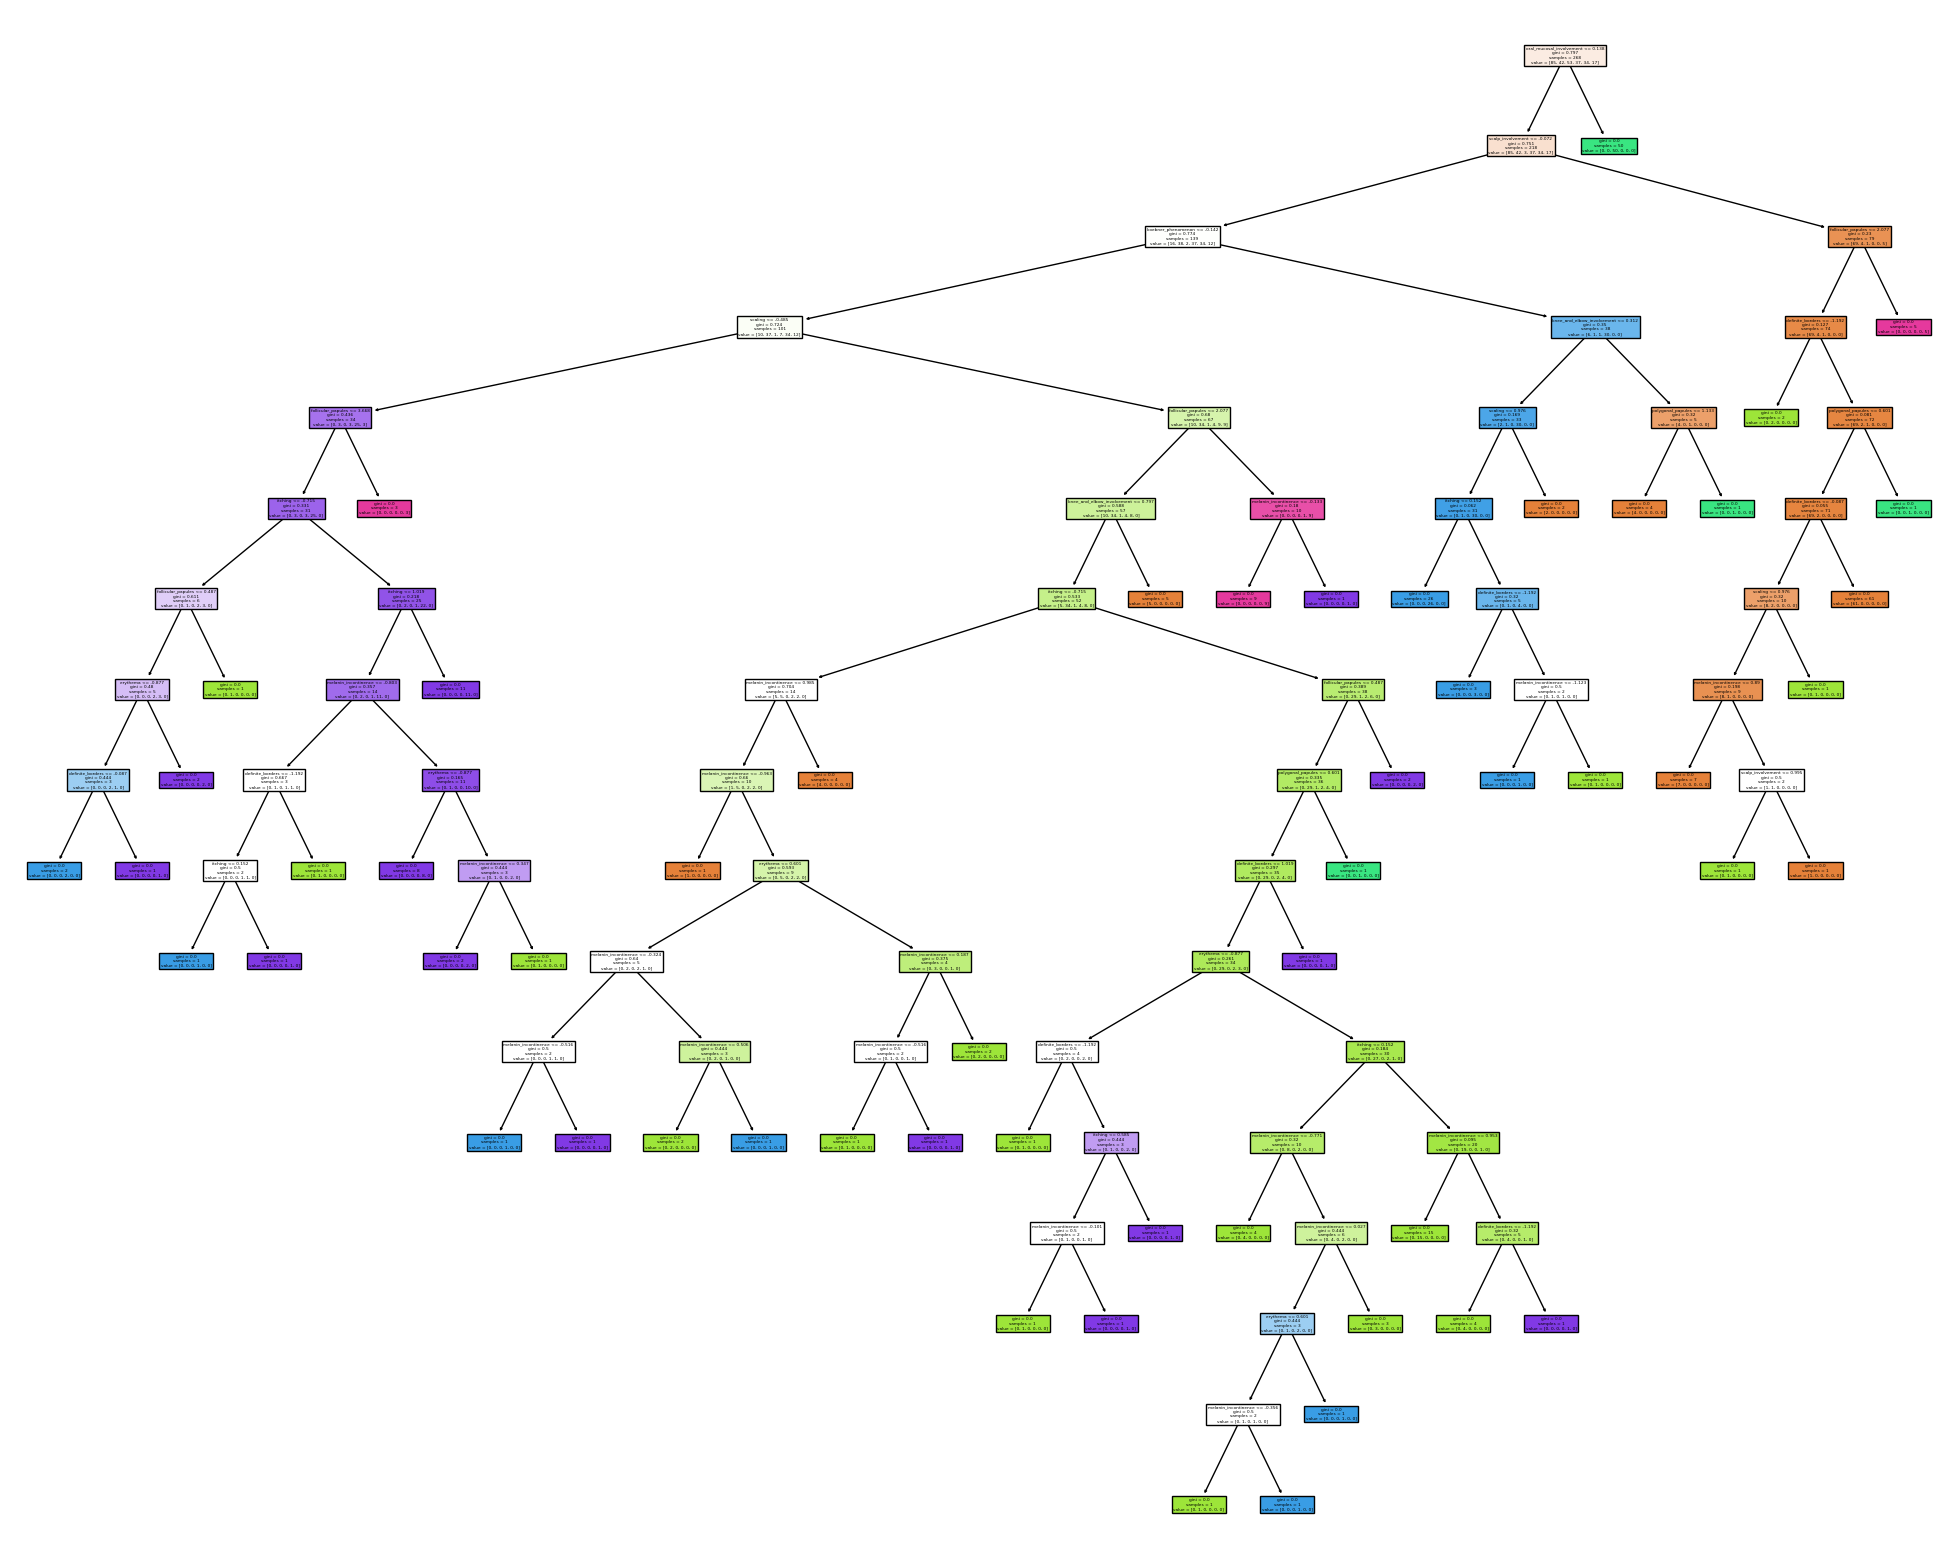

In [ ]:
plt.figure(figsize=(25,20))

start_time = time.time()

dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Decision Tree'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

tree.plot_tree(dtree, filled=True,feature_names=df_new.columns)


# Perceptron

In [ ]:
start_time = time.time()

clf = Perceptron(tol=1e-3, random_state=0)
X_train_perc = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

results_y_pred.append(y_pred)

end_time = time.time()
training_time = end_time - start_time

results['Perceptron'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

# Comparison of Results

>Naive Bayes

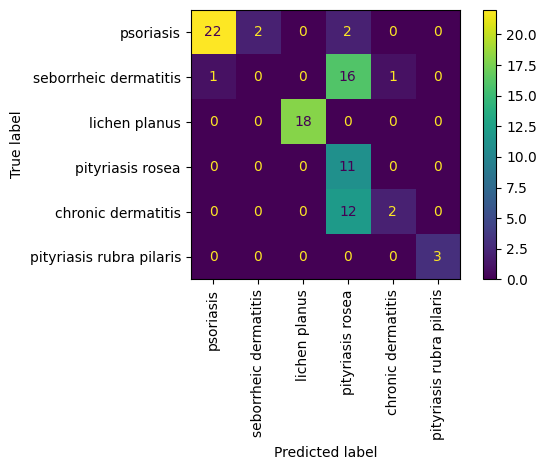

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, results_y_pred[0], display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

> PCA

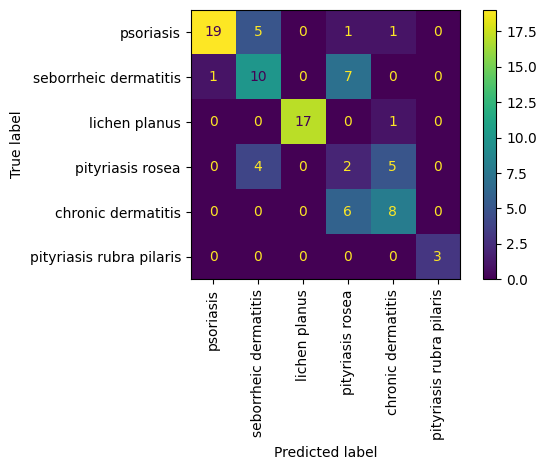

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, results_y_pred[1], display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

> Support Vector Machines (SVM)

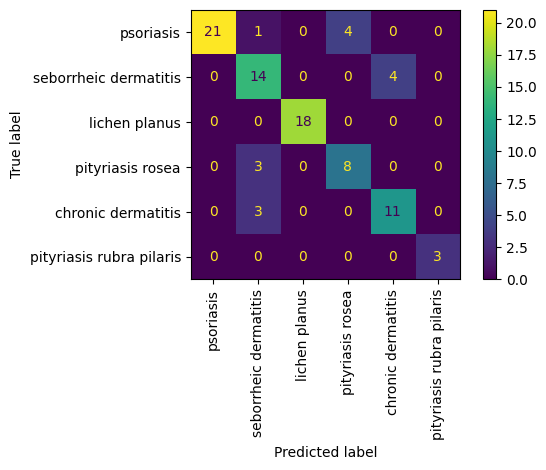

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, results_y_pred[2], display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

> Decision Tree

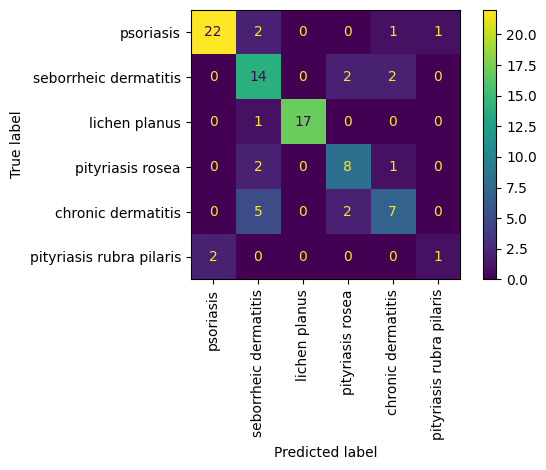

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, results_y_pred[3], display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

> Perceptron

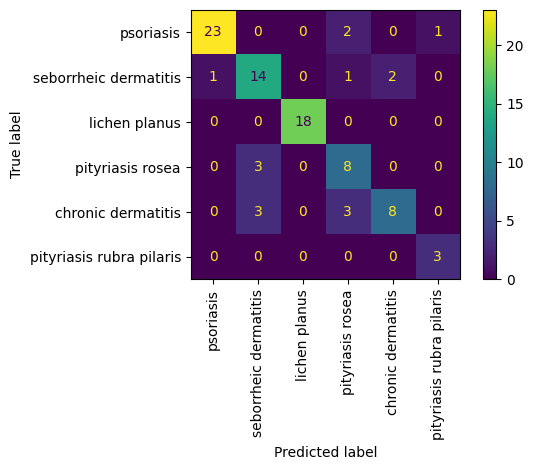

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, results_y_pred[4], display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

Let's compare the results obtained through a dataframe containing all the collected information.

In [ ]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Gaussian Naive Bayes,0.622222,0.646157,0.622222,0.581054,0.002743
Principal Component Analysis (PCA),0.655556,0.711282,0.655556,0.678305,0.009015
Support Vector Machines (SVM),0.833333,0.851111,0.833333,0.838111,0.010285
Decision Tree,0.766667,0.778620,0.766667,0.767310,0.009097
Perceptron,0.822222,0.836138,0.822222,0.823644,0.014876


# Conclusion of the Project Results

For our main objective, classifying the types of erythemato-squamous diseases, we were able to achieve very good results, ranging from the baseline methods up to excellent results with the more powerful methods.

We observed that all methods performed with an accuracy greater than 83.3%, with the best method being the Perceptron, achieving 97.7% accuracy. In terms of execution time, the best method was PCA, which reached 94.4% accuracy in just 0.007440 seconds.

For the secondary objective, there were more difficulties and confusions in classification, which reinforces the hypothesis that these diseases are clinically challenging to diagnose. Despite this, an accuracy above 62.2% was achieved, again with the best performance by the Perceptron, reaching 82.2% accuracy.

Overall, the classification was successful. Personally, I was pleasantly surprised by how well the chosen methods classified the dataset, as well as by the results that continuously reflect the challenges involved in analyzing the classification of erythemato-squamous diseases.

⚠️Warning: The presentation may include images of these diseases that could be somewhat sensitive, but to better understand the difficulties faced by professionals in these cases and to raise awareness of the importance of skin care, I believe it is necessary to show them.